# Mall Customers Segmentation using K-means
## Introduction
In this notebook, we are going to try to segment customer data we've got from Mall. The dataset is small and easy to work with, has no missing values and almost no outliers. So, we will try to solve our probleme into the following steps : 
   1. Import libraries & Dataset
   2. Data exploration & visualization
   3. Clustering using K-means
   4. Cluster selection
   5. Plot clusters & centroids
   
## Dataset overview
**- Customer ID :** Id of customer, this field will be dropped as it's not useful <br>
**- Gender :** customer gender - female / male <br>
**- Age :** age of customer, we've got customers with age from 18 to 70 years <br>
**- Annual Income :** income of customer, will be renamed to income only, values from 13 to 137 <br>
**- Spending Score :** Score assigned by the mall based on customer behavior and spending nature, values from 1 to 99 <br>

## Load libraries & Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')

In [2]:
#Load Dataset
df = pd.read_csv('Mall_Customers.csv')
#Show first 5 rows of out Dataset
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration & Visualization
### Total rows & columns  

In [3]:
#Print Data shape
print('Data Shape :', df.shape)

Data Shape : (200, 5)


### Data check
It is basic to check if dataset fields are stored in proper format (sometimes number is stored as object), and quickly check if we have to deal with missing values as well.

#### Basic informations

In [4]:
#Basic informations about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We can see that there are no missing values as all the columns has 200 entries properly.

#### Basic statistics

In [5]:
#Basic statistics about dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Rename columns
It is not needed to rename columns, but it is much simpler to work with dataset that has simple naming convention. *Customer ID* column is dropped as well.

In [6]:
df = df.drop('CustomerID', axis=1)
df.columns = ['Gender', 'Age', 'Income', 'Score']
df.head(5)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Distribution difference based on gender
There is nothing significant about difference based on gender on features Age, Income or Score except slightly more females in age around 28 and slightly more females with score around 50. 

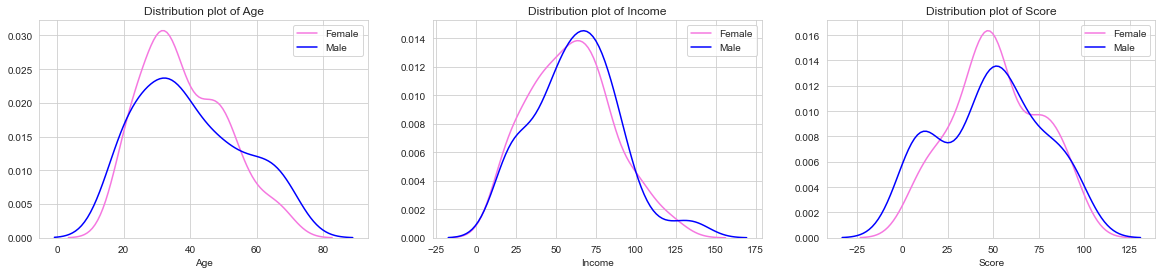

In [7]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='#f578e0', hist=False, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Distribution plot of Age')

plt.subplot(1,3,2)
sns.distplot(df.Income[df['Gender']=='Female'], color='#f578e0', hist=False, kde=True, label='Female')
sns.distplot(df.Income[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Distribution plot of Income')

plt.subplot(1,3,3)
sns.distplot(df.Score[df['Gender']=='Female'], color='#f578e0', hist=False, kde=True, label='Female')
sns.distplot(df.Score[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Distribution plot of Score')

plt.show()

### Count plot of Gender 

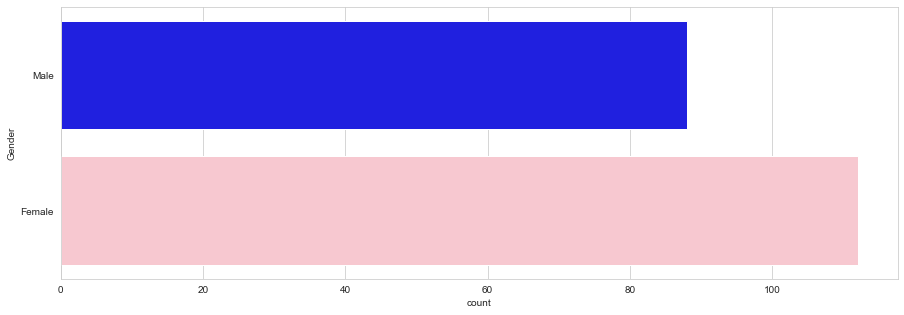

Count of Gender variable : 
 Gender
Female    112
Male       88
Name: Gender, dtype: int64


In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y ='Gender', data=df, palette=['blue','pink'])
plt.show()

print('Count of Gender variable : \n', df.groupby('Gender')['Gender'].count())

### Differences in Age, Income and Score by Gender
We will use Boxplot visualization to see also quartiles, distribution, median and outliers. 

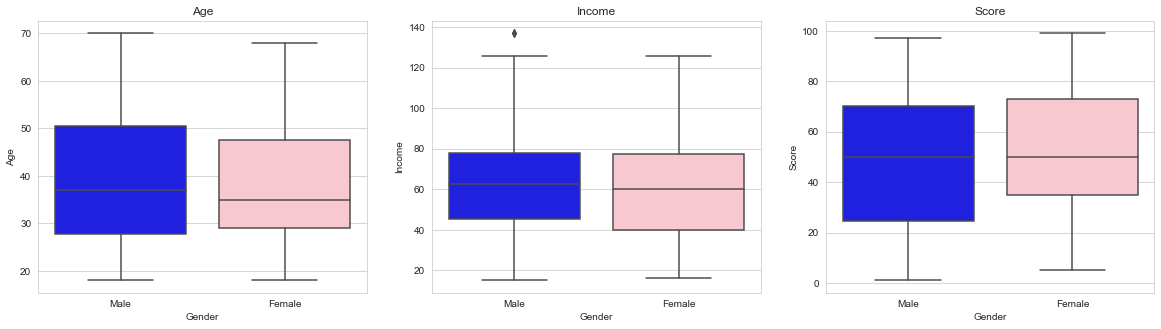

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age, palette=['blue','pink'])
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.Income, palette=['blue','pink'])
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.Score, palette=['blue','pink'])
plt.title('Score')

plt.show()

We can see there is one outlier by Income/Male, but we will not handle it. Moreover, There is no significant difference or finding except that Female seems to have higher bound for lower score (first quartile), but we already know they like to go to shopping malls more likely than Males.

### Relationship between variables
In this part, we will investigate if there is significant relationship between variables, i.e. income increase with age or score decrease with age.

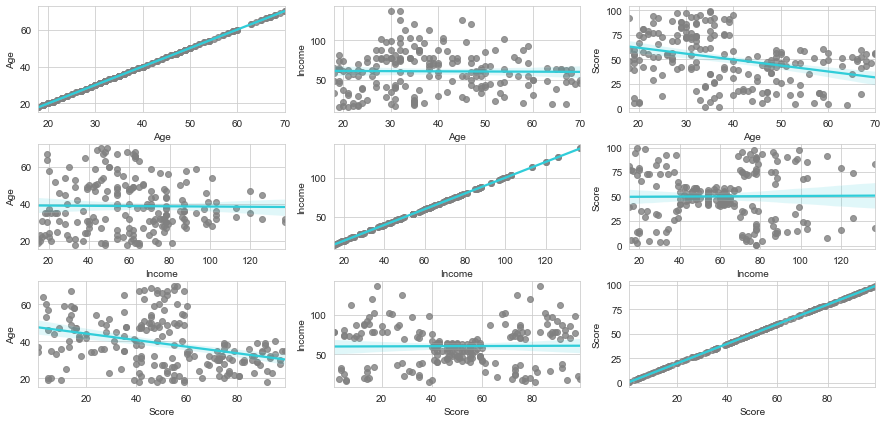

In [10]:
#Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Income' , 'Score']:
    for y in ['Age' , 'Income' , 'Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.2)
        sns.regplot(x = x , y = y , data = df, scatter_kws = {'color':'gray'}, line_kws = {'color':'#30cdd9'})
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

It seems to be 2 groups of customers by age Vs score (top left quarter vs bottom right quarter), where diagonal is delimiting them.

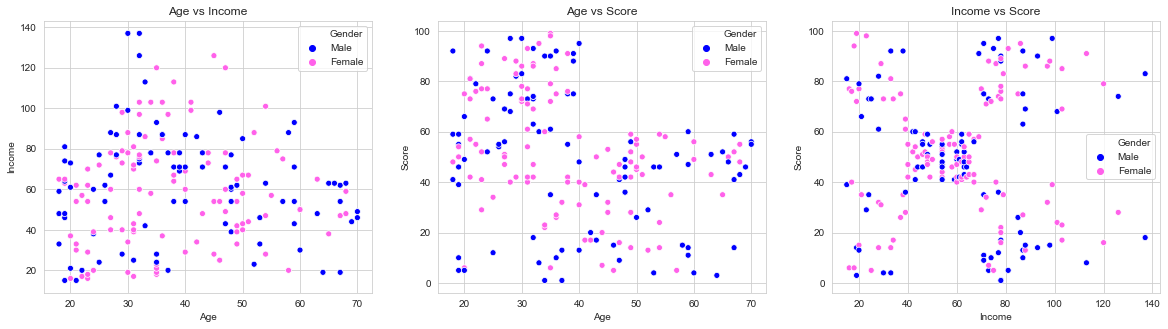

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender, palette=['blue','#ff61ea'])
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender, palette=['blue','#ff61ea'])
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender, palette=['blue','#ff61ea'])
plt.title('Income vs Score')

plt.show()

What is more important is actually **Income** Vs **Score** plot, where we can see 5 different groups of customers (corners & center). That mean, we've probably found ideal way to cluster our customers based on *Income* and *Score*.

### Income & Score by Age
Here, we'll check if there is significant difference (increasing/decreasing trend) when looking on Income or Score by Age. What is bit weird for me is that 18 years people has almost same score as 60 years old.

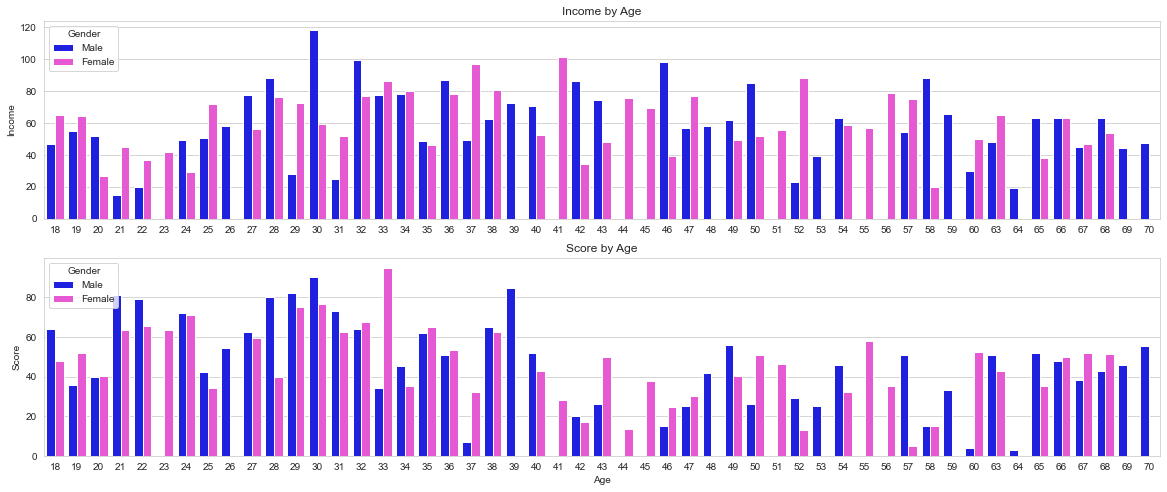

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0, palette = ['blue','#fc42e5'])
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0, palette = ['blue','#fc42e5'])
plt.title('Score by Age')

plt.show()

We can notice that income seems to be highest for age group 25-50 comparing to others and similary, score is higer for group of people in age 20-40 comparing to others.

### Features selection
We will consider only 2 features (Annual income and Spending Score) with no label available.

In [14]:
#Feature selection for the model
X = df.iloc[:, [2,3]].values

## Clustering using K-means
First, we will try to find ideal number of clusters for K-means using *Elbow method*, where we draw inertia for number of clusters (usually) in range 1-10 and try to find ones with highest gap angle. Then we will use these values to draw clusters and decide which one is most suitable for us.

### Visualize the ELBOW method to get the optimal value of K
We always assume the max number of cluster would be 10, and we can judge the number of clusters by doing averaging.

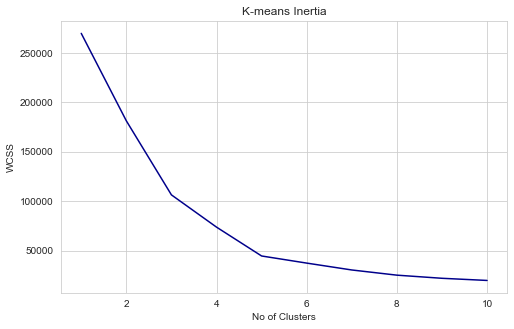

In [15]:
from sklearn.cluster import KMeans
wcss=[]

#Static code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #Inertia is the formula used to segregate the data points into clusters
    
#Visualizing the ELBOW  
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, color='darkblue')
plt.title('K-means Inertia')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

If we zoom out this curve, then we will see that last elbow comes at k=5. No matter what range we select ex- (1,21) also we will see the same behaviour, but if we chose higher range it is little difficult to visualize the *ELBOW*, that is why we usually prefer range (1,11). Finally we got that k=5.

### Build K-means model
For unsupervised learning we use **fit_predict()** wherein for supervised learning we use **fit_tranform()**. Now, how and where we will deploy this model in production is depends on what tool we are using. 

In [16]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X) #Final model

## Visualize final clusters

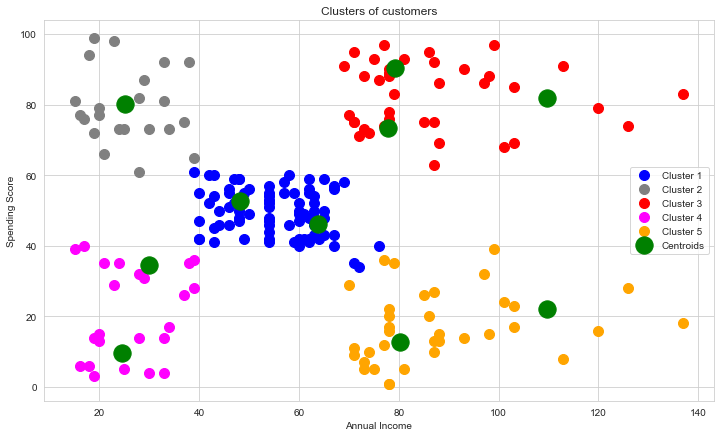

In [17]:
plt.figure(figsize=(12,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'gray', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Conclusion 
We have selected to have 5 clusters, meaning 5 customer groups. But who are people in these groups? Let's try to describe them for marketing team :

  - Cluster 1 _(Blue)_ **-->** Average in terms of earning and spending **(Neutral)** 
  - Cluster 2 _(Gray)_ **-->** Earning less but spending more **(Poor & Spender)**
  - Cluster 3 _(Red)_ **-->** Earning high & also spending high **(Rich & Spender)**
  - Cluster 4 _(Magenta)_ **-->** Earning less & spending less **(Poor & Not-spender)**
  - Cluster 5 _(Orange)_ **-->** Earning high but spending less **(Rich & Not-spender)**

We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these are easy to converse, wherein others we can set like once in a week or once in a month.